In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
dfD= pd.read_csv("CBS_2021-2023_Daily_Weather.csv")

In [26]:
dfD.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [27]:
dfD.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')

In [28]:
dfD = dfD.rename(columns={'weathercode (wmo code)':'weather',
                       'apparent_temperature_mean (°C)':'Apparenttemp',
                       'temperature_2m_mean (°C)':'Temp',
                       'windspeed_10m_max (km/h)':'Windspeed',
                       'Day_of_Week':'Weekdays'})
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [29]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Casual        1095 non-null   int64  
 1   Date          1095 non-null   object 
 2   Member        1095 non-null   int64  
 3   Total_rides   1095 non-null   int64  
 4   Apparenttemp  1095 non-null   float64
 5   Temp          1095 non-null   float64
 6   weather       1095 non-null   int64  
 7   Windspeed     1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [30]:
# Preprocess the data
# 1. Handle missing values (if any)
dfD = dfD.fillna(0)  # Replace missing values with 0 (adjust as needed)

In [31]:
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [32]:
# Convert the 'Date' column to datetime format
dfD['Date'] = pd.to_datetime(dfD['Date'])

# Extract Month and Year from the 'Date' column
dfD['Month'] = dfD['Date'].dt.month
dfD['Year'] = dfD['Date'].dt.year

dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021


In [33]:
# Add a new column with an index as a counting number
dfD['Count'] = dfD.index

dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4


In [34]:
# Add an index column
df = dfD.reset_index() 

dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4


[Text(0.5, 1.0, 'Count of bikes during Month')]

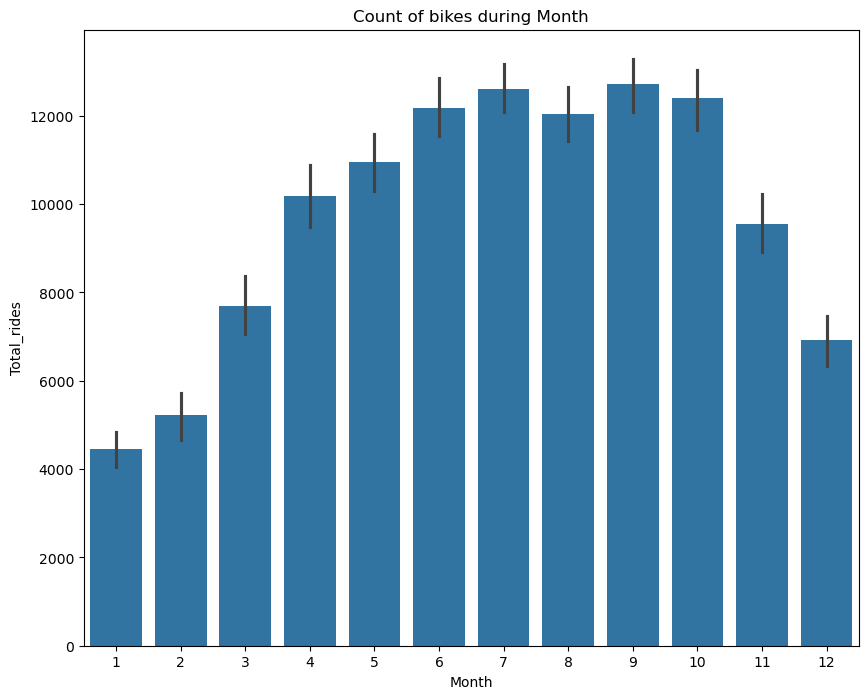

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=dfD, x='Month', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during Month')

In [36]:
dfD.apply(lambda x: len(x.unique()))

Casual          1010
Date            1095
Member          1034
Total_rides     1042
Apparenttemp     398
Temp             350
weather           13
Windspeed        239
Month             12
Year               3
Count           1095
dtype: int64

In [37]:
# 2. Convert Date to datetime format
dfD['Date'] = pd.to_datetime(dfD['Date'])

In [38]:
# 3. Extract Day of Week
dfD['Weekdays'] = dfD['Date'].dt.dayofweek

In [39]:
dfD.isnull().sum()

Casual          0
Date            0
Member          0
Total_rides     0
Apparenttemp    0
Temp            0
weather         0
Windspeed       0
Month           0
Year            0
Count           0
Weekdays        0
dtype: int64

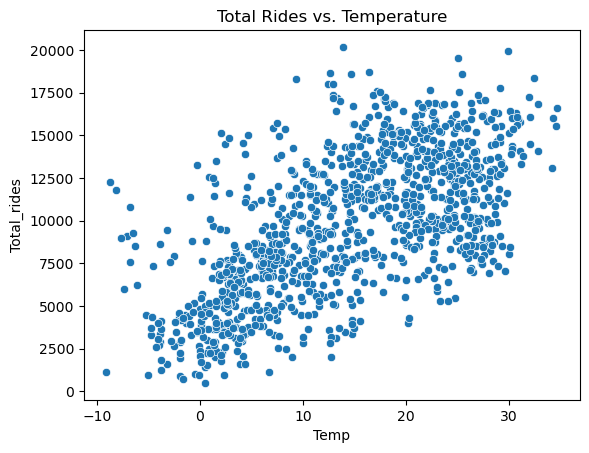

In [40]:

# Scatter plot: Total_rides vs. temperature_2m_mean
sns.scatterplot(x='Temp', y='Total_rides', data=dfD)
plt.title('Total Rides vs. Temperature')
plt.show()

<Figure size 640x480 with 0 Axes>

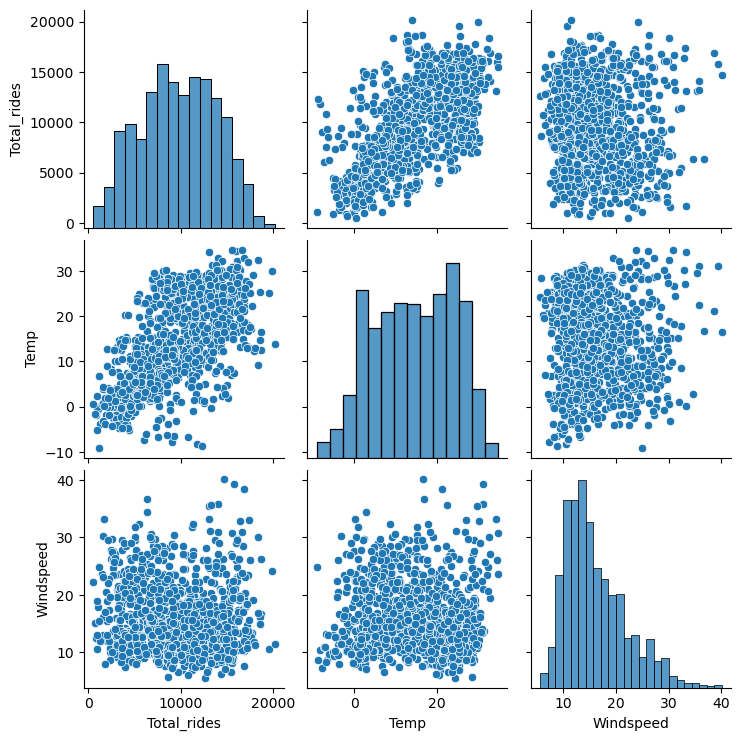

In [41]:
# Pair plot: Visualize relationships between multiple features
plot = plt.figure(figure = (8,8))
sns.pairplot(dfD[['Total_rides', 'Temp', 'Windspeed']])
plt.show()

In [42]:
dfD.columns

Index(['Casual', 'Date', 'Member', 'Total_rides', 'Apparenttemp', 'Temp',
       'weather', 'Windspeed', 'Month', 'Year', 'Count', 'Weekdays'],
      dtype='object')

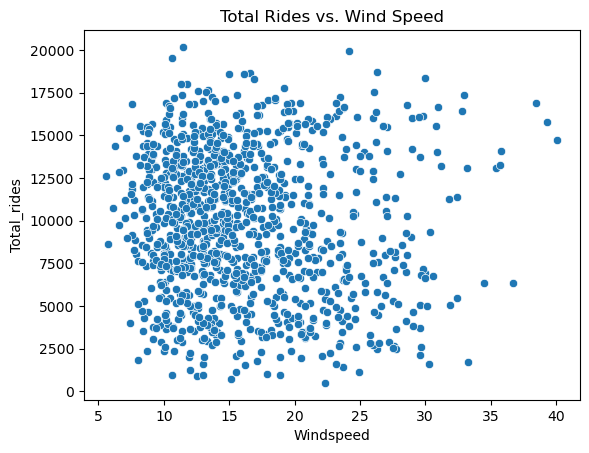

In [43]:
# Scatter plot: Total_rides vs. windspeed_10m_max
sns.scatterplot(x='Windspeed', y='Total_rides', data=dfD)
plt.title('Total Rides vs. Wind Speed')
plt.show()

<Axes: xlabel='weather', ylabel='Total_rides'>

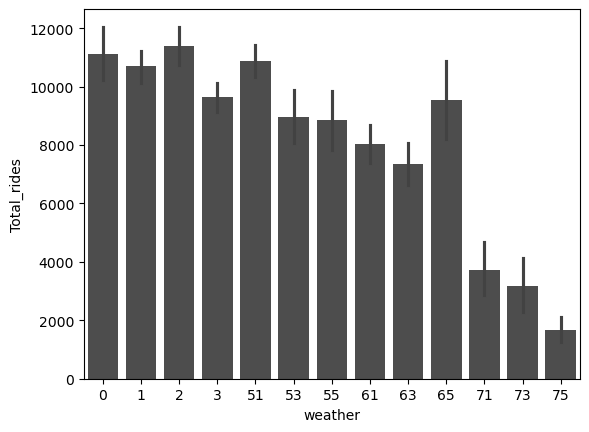

In [44]:
plot = plt.figure(figure = (5,5))
sns.barplot(x = 'weather', y= 'Total_rides', data= dfD, color='.3')

[Text(0.5, 1.0, 'Count of bikes during different days')]

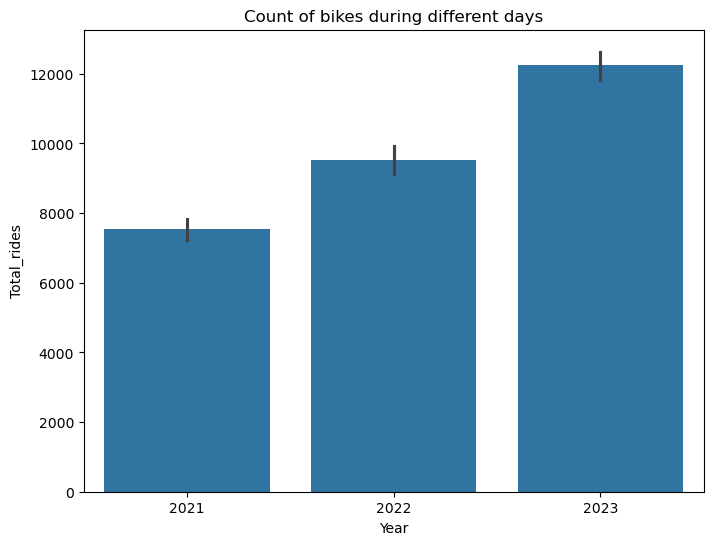

In [45]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=df, x='Year', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different days')